<a href="https://colab.research.google.com/github/ruchisurya2002-maker/Analytics-Projects-/blob/main/Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_excel("/content/loan_Sanction_status (1).xlsx")

In [ ]:
data

,Loan_ID,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,3509.4,1,0,0,1,0,5849,0.0,360,1,1,1
1,LP001003,128.0,1,1,1,1,0,4583,1508.0,360,1,3,0
2,LP001005,66.0,1,1,0,1,1,3000,0.0,360,1,1,1
3,LP001006,120.0,1,1,0,2,0,2583,2358.0,360,1,1,1
4,LP001008,141.0,1,0,0,1,0,6000,0.0,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,LP002978,71.0,2,0,0,1,0,2900,0.0,360,1,3,1
560,LP002979,40.0,1,1,3,1,0,4106,0.0,180,1,3,1
561,LP002983,253.0,1,1,1,1,0,8072,240.0,360,1,1,1
562,LP002984,187.0,1,1,2,1,0,7583,0.0,360,1,1,1


In [ ]:
data.head()

,Loan_ID,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,3509.4,1,0,0,1,0,5849,0.0,360,1,1,1
1,LP001003,128.0,1,1,1,1,0,4583,1508.0,360,1,3,0
2,LP001005,66.0,1,1,0,1,1,3000,0.0,360,1,1,1
3,LP001006,120.0,1,1,0,2,0,2583,2358.0,360,1,1,1
4,LP001008,141.0,1,0,0,1,0,6000,0.0,360,1,1,1


In [ ]:
data.describe()

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,262.075532,1.200355,0.643617,0.755319,1.214539,0.148936,5466.436170,1530.448440,342.595745,0.842199,1.969858,0.682624
std,818.638819,0.400621,0.479355,1.016938,0.410867,0.356342,6271.344106,2471.721359,63.838715,0.364878,0.784494,0.465868
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,150.000000,0.000000,36.000000,0.000000,1.000000,0.000000
25%,100.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2892.750000,0.000000,360.000000,1.000000,1.000000,0.000000
50%,128.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3815.000000,1105.500000,360.000000,1.000000,2.000000,1.000000
75%,172.250000,1.000000,1.000000,2.000000,1.000000,0.000000,5803.750000,2250.000000,360.000000,1.000000,3.000000,1.000000
max,12400.200000,2.000000,1.000000,3.000000,2.000000,1.000000,81000.000000,33837.000000,480.000000,1.000000,3.000000,1.000000


In [ ]:
# prompt: check for missing values in the data

data.isnull().sum()


,0
Loan_ID,0
LoanAmount,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
Loan_Amount_Term,0


In [ ]:
# prompt: check for duplicate values in the data

import pandas as pd

# Assuming 'data' DataFrame is already loaded as in the previous code

duplicate_rows = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# To check for duplicates in a specific column:
duplicate_in_column = data[data.duplicated(subset=['Loan_ID'])] #Replace 'Loan_ID' with your column name
print("\nDuplicate values in 'Loan_ID' column:")
duplicate_in_column


Duplicate Rows:
Empty DataFrame
Columns: [Loan_ID, LoanAmount, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

Duplicate values in 'Loan_ID' column:


,Loan_ID,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


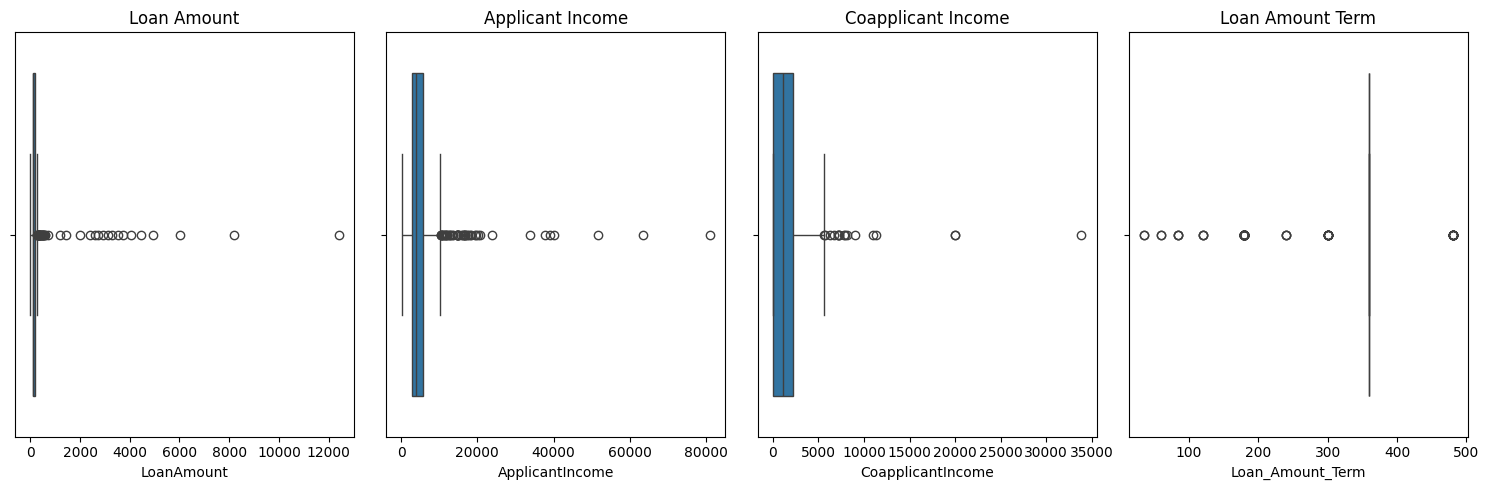

In [ ]:
# prompt: create box plot for loan amount, applicant income, coapplicant income, loan amount term

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
sns.boxplot(x=data['LoanAmount'])
plt.title("Loan Amount")

plt.subplot(1,4,2)
sns.boxplot(x=data['ApplicantIncome'])
plt.title("Applicant Income")

plt.subplot(1,4,3)
sns.boxplot(x=data['CoapplicantIncome'])
plt.title("Coapplicant Income")

plt.subplot(1,4,4)
sns.boxplot(x=data['Loan_Amount_Term'])
plt.title("Loan Amount Term")

plt.tight_layout()
plt.show()


Outliers in LoanAmount:
     LoanAmount
0        3509.4
9         349.0
20        315.0
31        320.0
32       2605.2
50        286.0
63        312.0
76       1437.0
94       8190.0
95       4941.0
105      4470.6
116       370.0
117      3303.0
123       290.0
143       600.0
158       700.0
164       495.0
186      2395.2
239       304.0
257       436.0
262     12400.2
283      1200.0
286       480.0
296      3114.6
297       300.0
298       376.0
306       490.0
323       308.0
340       570.0
343       380.0
351       296.0
377       360.0
399       405.0
402      6028.2
404      2002.8
441      2730.0
449       500.0
471       311.0
480       480.0
481      4060.2
482       400.0
491       324.0
505      2920.2
514       600.0
543       292.0
554       496.0
555      3720.0

Outliers in ApplicantIncome:
     ApplicantIncome
9              12841
31             12500
50             11500
63             10750
94             13650
98             11417
107            14583
110       

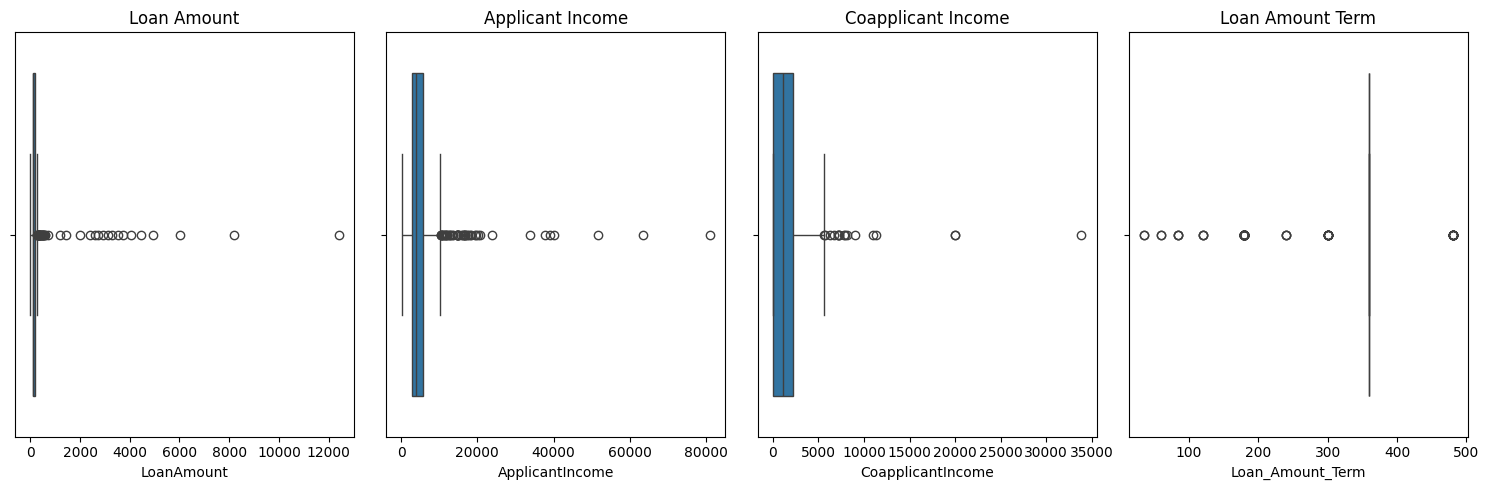

In [ ]:
# prompt: check for outliers for all 4

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate quartiles and IQR for outlier detection
def find_outliers_IQR(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find and print outliers for each column
columns_to_check = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
for col in columns_to_check:
    outliers = find_outliers_IQR(data, col)
    print(f"Outliers in {col}:\n{outliers[[col]]}\n")


# Boxplots (as before, but now with outlier information)
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.boxplot(x=data['LoanAmount'])
plt.title("Loan Amount")

plt.subplot(1, 4, 2)
sns.boxplot(x=data['ApplicantIncome'])
plt.title("Applicant Income")

plt.subplot(1, 4, 3)
sns.boxplot(x=data['CoapplicantIncome'])
plt.title("Coapplicant Income")

plt.subplot(1, 4, 4)
sns.boxplot(x=data['Loan_Amount_Term'])
plt.title("Loan Amount Term")

plt.tight_layout()
plt.show()


In [ ]:
# prompt: drop loan id column

data = data.drop('Loan_ID', axis=1)


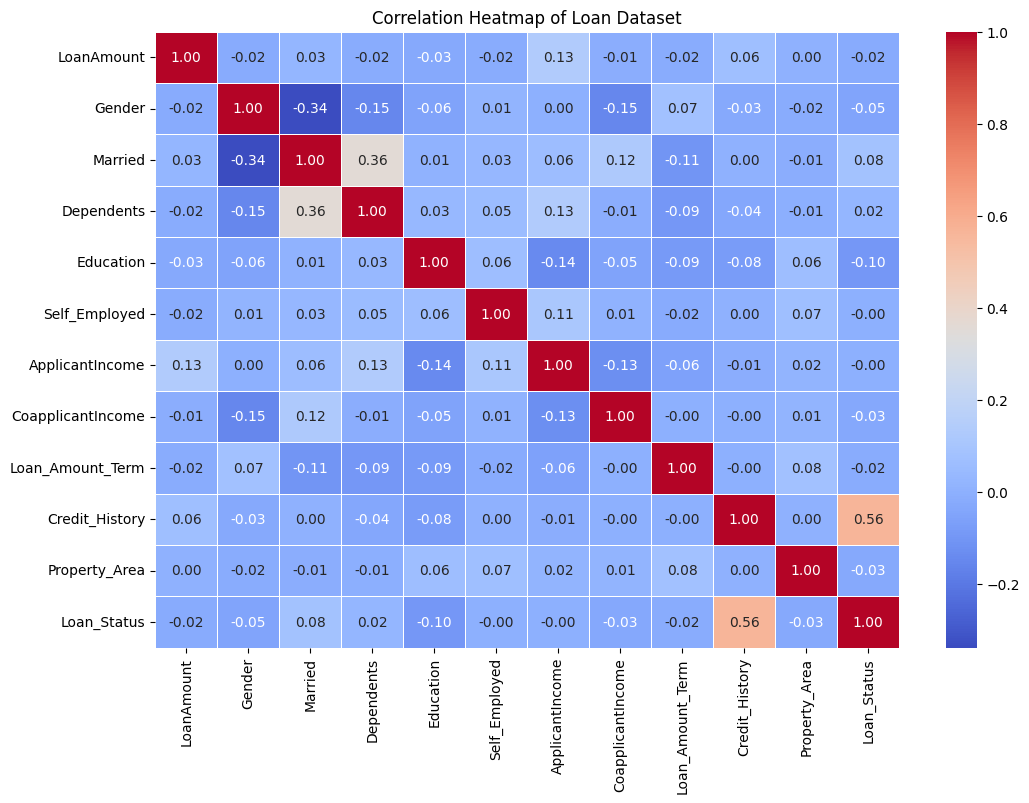

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check for numeric columns only
numeric_data = data.select_dtypes(include=['number'])  # Select only numerical columns

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Loan Dataset')
plt.show()



In [ ]:
# prompt: define the dependent y and independent varibales x

# Define dependent and independent variables
y = data['Loan_Status']  # Assuming 'Loan_Status' is the target variable
X = data.drop('Loan_Status', axis=1)  # All other columns are independent variables


In [ ]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
559,1
560,1
561,1
562,1


In [ ]:
X

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,3509.4,1,0,0,1,0,5849,0.0,360,1,1
1,128.0,1,1,1,1,0,4583,1508.0,360,1,3
2,66.0,1,1,0,1,1,3000,0.0,360,1,1
3,120.0,1,1,0,2,0,2583,2358.0,360,1,1
4,141.0,1,0,0,1,0,6000,0.0,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
559,71.0,2,0,0,1,0,2900,0.0,360,1,3
560,40.0,1,1,3,1,0,4106,0.0,180,1,3
561,253.0,1,1,1,1,0,8072,240.0,360,1,1
562,187.0,1,1,2,1,0,7583,0.0,360,1,1


In [ ]:
# prompt: run logistics regression using stat model where loan status is dependent variable

import statsmodels.api as sm

# Assuming X and y are defined as in the previous code
# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.458802
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  564
Model:                          Logit   Df Residuals:                      552
Method:                           MLE   Df Model:                           11
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                  0.2658
Time:                        05:30:52   Log-Likelihood:                -258.76
converged:                       True   LL-Null:                       -352.43
Covariance Type:            nonrobust   LLR p-value:                 3.133e-34
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5728      0.990     -1.589      0.112      -3.512       0.367
LoanAmou

Confusion Matrix:
[[ 84  95]
 [  7 378]]


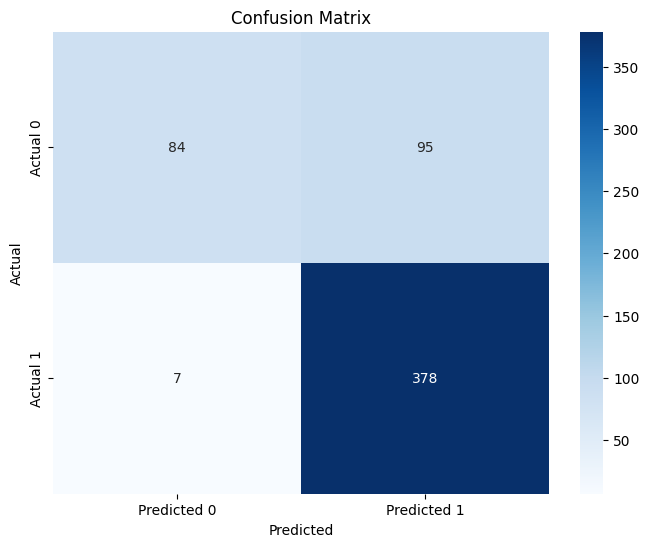

In [ ]:
# prompt: give confusion matrix using stats model

# Assuming X, y, and the model are defined as in the previous code

from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the data
y_pred = model.predict(X)

# Convert probabilities to class labels (0 or 1)
y_pred_class = (y_pred > 0.5).astype(int)  # Adjust threshold if needed


# Create the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:")
print(conf_matrix)


# You can also visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# prompt: do  logistics regression using stats model, drop insignficant variable one. by one  using p value

import pandas as pd
import statsmodels.api as sm

# Assuming X and y are defined as in the previous code and the initial model is fit
def backward_elimination(X, y):
    X = sm.add_constant(X)  # Add a constant
    model = sm.Logit(y, X).fit()
    while True:
      p_values = model.pvalues[1:]  # Exclude intercept
      max_p_value = p_values.max()
      if max_p_value > 0.05:
        variable_to_remove = p_values.idxmax()
        X = X.drop(variable_to_remove, axis=1)
        model = sm.Logit(y, X).fit()
      else:
        break
    return model, X


# Example Usage
# Assuming X and y are your independent and dependent variables respectively
model, updated_X = backward_elimination(X,y)
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.458802
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.458809
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.458850
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.458967
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.459131
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.459370
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.459673
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.461076
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.463155
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465232
  

Confusion Matrix:
[[ 82  97]
 [  7 378]]


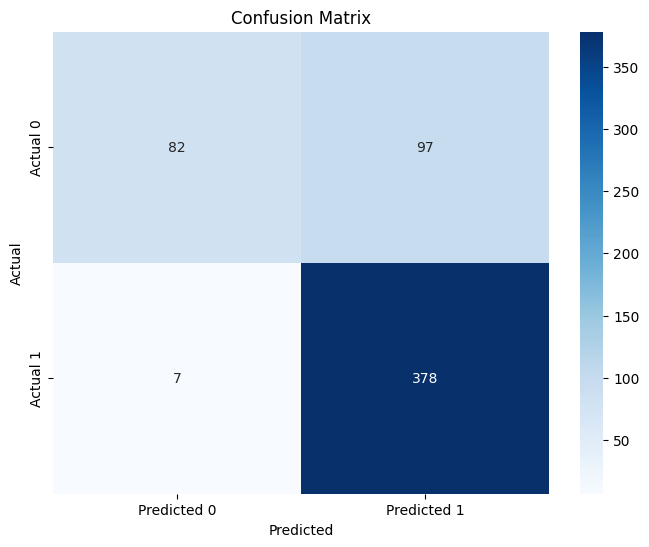

In [ ]:
# prompt: give confusion matrrix using stats model

import matplotlib.pyplot as plt
# Assuming X, y, and the model are defined as in the previous code


# Make predictions on the data
y_pred = model.predict(updated_X)

# Convert probabilities to class labels (0 or 1)
y_pred_class = (y_pred > 0.5).astype(int)  # Adjust threshold if needed


# Create the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:")
print(conf_matrix)


# You can also visualize the confusion matrix using seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# prompt: generate AUC of the model

from sklearn.metrics import roc_auc_score

# Assuming y and y_pred are defined from the previous logistic regression model
# y: true labels
# y_pred: predicted probabilities

auc = roc_auc_score(y, y_pred)
print(f"AUC of the model: {auc}")


AUC of the model: 0.7557933686425307
